In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget
matplotlib.rc('font', size=18)
import uncertainties as unc
import scipy.special as ss

from tqdm.notebook import tqdm

import sys
sys.path.append('../')
import general_purpose.utilities as ut
import general_purpose.uplotlib as uplt

from importlib import reload

import reconstruct as rec


In [7]:
# folder = './__test__/k__4--nens__999--T__10'
# folder = './__test__/0--k__0--nens__999--T__10'
# folder = './__test__/rv--k__4--nens__999--T__10'
# folder = './__test__/rv--k__4--nens__20--T__10'
# folder = './__test__/0--k__4--nens__100--T__10'
# folder = './__test__/c--k__0--nens__999--T__10'
# folder = './__test__/c--k__0--nens__100--T__10'
# folder = './__test__/f1--k__4--nens__999--T__10'
folder = './__test__/c0--k__0--nens__999--T__10'
rec_dict = ut.json2dict(f'{folder}/reconstructed.json')

In [20]:
reload(rec)

<module 'reconstruct' from '/media/alessandro/OS/Users/ale57/Documents/0. Lyon/WORK/REA-Veros/demo/reconstruct.py'>

In [52]:
rec_dict = rec.reconstruct(f'{folder}/i0019')

DONE


In [8]:
rec_trajs = {}

for rname, r in rec_dict['members'].items():
    traj = []
    for subfolder,e in zip(rec_dict['folders'], r['ancestry']):
        traj.append(np.load(f'{folder}/{subfolder}/{e}-traj.npy'))
    traj = np.concatenate(traj)

    rec_trajs[rname] = traj

observables = {r: traj[-1,1] for r,traj in rec_trajs.items()}

In [60]:
observables = {r: np.load(f'{folder}/i0019/e{i+1:03d}-traj.npy')[-1,1] for i,r in enumerate(observables)}

## Plot trajectories

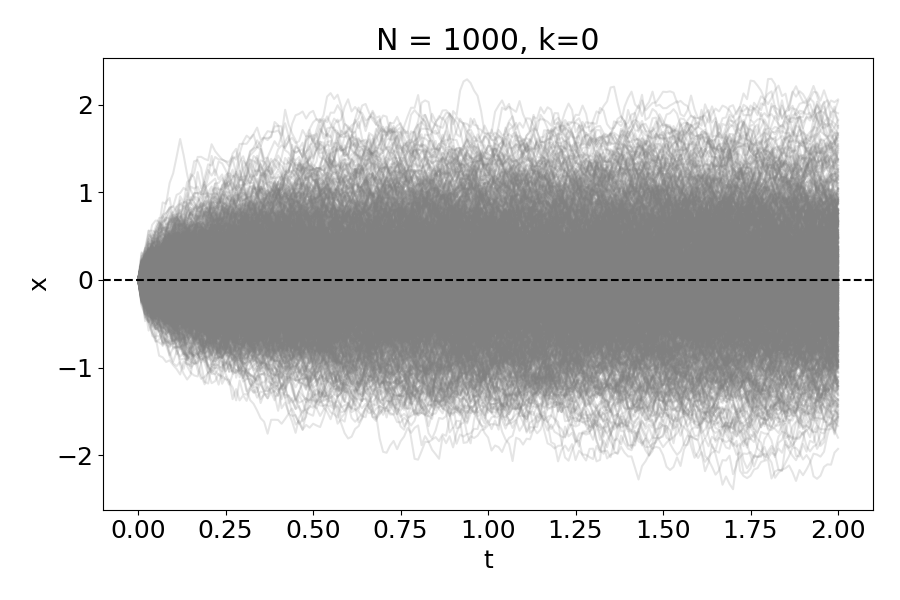

In [9]:
plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))

for traj in rec_trajs.values():
    plt.plot(traj[:,0], traj[:,1], color='gray', alpha=0.2)
    
plt.axhline(0, color='black', linestyle='dashed')

plt.xlabel('t')
plt.ylabel('x')
plt.title('N = 1000, k=0')

fig.tight_layout()

In [21]:
plt.close('all')

In [73]:
np.min(list(observables.values()))

1.0618594036131523

In [32]:
rec_dict['independent_parents']

[44,
 46,
 48,
 49,
 51,
 52,
 57,
 58,
 64,
 71,
 77,
 82,
 98,
 113,
 134,
 164,
 206,
 269,
 343,
 533]

## Compute expectations

In [56]:
def f(x, a):
    return float(x > a)

def expectation(func, **kwargs):
    _f = np.array([func(x, **kwargs) for x in observables.values()])
    print(np.mean(_f))
    _w = np.array([r['weight'] for r in rec_dict['members'].values()])
    # _w = np.exp(-np.array([r['cum_log_escore'] for r in rec_dict['members'].values()]))
    # _n = np.exp(rec_dict['cum_log_norm_factor'])

    mean = np.mean(_f*_w)
    std = np.sqrt(np.mean(_f*_w**2)/len(_w))

    return unc.ufloat(mean,std)

In [39]:
np.min(list(observables.values()))

0.30721723465552814

In [61]:
expectation(f, a=2)

0.4694694694694695


0.0014738696775923035+/-0.0001743876179864498

## Theoretical probability of overcoming threshold

In [57]:
lam = 1
sig = 1
def ou_var(t):
    return sig**2/(2*lam)*(1 - np.exp(-2*lam*t))

cum_gaus = lambda x: 0.5*(1 + ss.erf(x/np.sqrt(2)))

overcoming_prob = lambda x,v: cum_gaus(-x/np.sqrt(v))

In [58]:
t = rec_trajs['r001'][-1,0]
v = ou_var(t)

In [71]:
a = np.linspace(0,4,101)

e = np.array([expectation(f, a=_a) for _a in a])
e_th = overcoming_prob(a,v)

1.0
0.998998998998999
0.997997997997998
0.997997997997998
0.995995995995996
0.994994994994995
0.992992992992993
0.992992992992993
0.990990990990991
0.988988988988989
0.985985985985986
0.982982982982983
0.977977977977978
0.973973973973974
0.965965965965966
0.953953953953954
0.94994994994995
0.9469469469469469
0.9409409409409409
0.9319319319319319
0.9279279279279279
0.9019019019019019
0.8948948948948949
0.8908908908908909
0.8848848848848849
0.8728728728728729
0.8608608608608609
0.8458458458458459
0.8378378378378378
0.8168168168168168
0.8098098098098098
0.7887887887887888
0.7727727727727728
0.7587587587587588
0.7457457457457457
0.7327327327327328
0.6926926926926927
0.6606606606606606
0.6396396396396397
0.6256256256256256
0.6086086086086087
0.5915915915915916
0.5725725725725725
0.5505505505505506
0.5415415415415415
0.5165165165165165
0.4624624624624625
0.4444444444444444
0.43243243243243246
0.4084084084084084
0.3923923923923924
0.3843843843843844
0.3353353353353353
0.2972972972972973
0.286

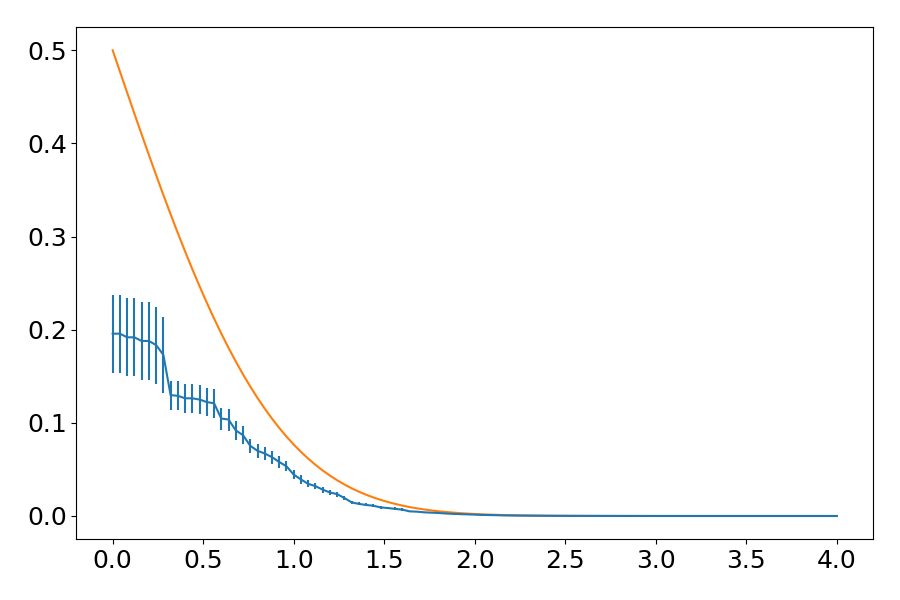

In [64]:
plt.close(2)
fig,ax = plt.subplots(figsize=(9,6))

uplt.plot(a,e)
plt.plot(a, e_th)
# plt.plot(a,uplt.std_dev(e)/uplt.nominal_value(e))
# plt.plot(a, uplt.nominal_value(e)/e_th - 1)

fig.tight_layout()

In [72]:
uplt.plot(a,e)
# plt.plot(a,uplt.std_dev(e)/uplt.nominal_value(e))

<ErrorbarContainer object of 3 artists>